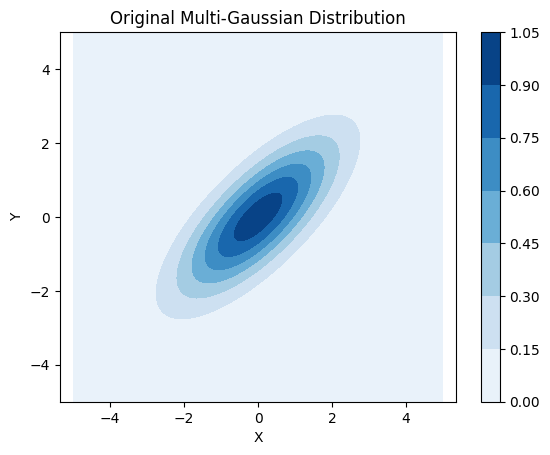

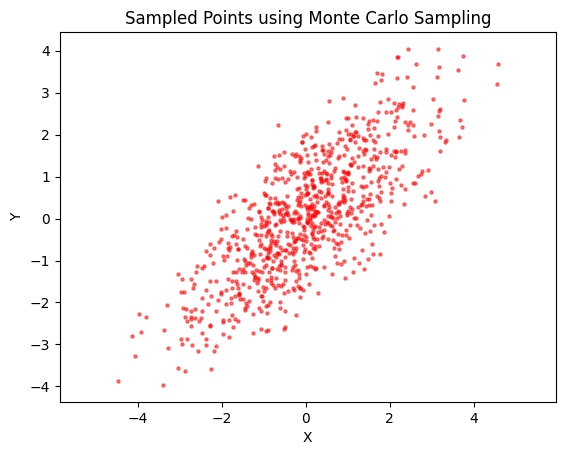

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for the multi-Gaussian distribution
mean = np.array([0, 0])  # Mean vector
covariance = np.array([[2, 1.5], [1.5, 2]])  # Covariance matrix

# Monte Carlo Sampling
def monte_carlo_sampling(num_samples):
    samples = []
    for _ in range(num_samples):
        # Generate random sample from a uniform distribution in the range [-5, 5]
        x = np.random.uniform(-5, 5)
        y = np.random.uniform(-5, 5)

        # Calculate the probability density function (PDF) of the multi-Gaussian distribution at the sample point
        pdf_value = 1 / (2 * np.pi * np.sqrt(np.linalg.det(covariance))) * \
                    np.exp(-0.5 * np.dot(np.dot(np.array([x, y]) - mean, np.linalg.inv(covariance)),
                                         np.array([x, y]) - mean))

        # Generate a random number between 0 and the maximum PDF value
        max_pdf = 1 / (2 * np.pi * np.sqrt(np.linalg.det(covariance)))
        random_number = np.random.uniform(0, max_pdf)

        # Accept the sample if the random number is less than the PDF value, otherwise reject it
        if random_number < pdf_value:
            samples.append([x, y])

    return np.array(samples)

# Number of samples to generate
num_samples = 10000

# Generate random samples using Monte Carlo sampling
samples = monte_carlo_sampling(num_samples)

# Visualize the original distribution (contour plot)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
Z = np.exp(-0.5 * np.einsum('ijk,kl,ijl->ij', pos - mean, np.linalg.inv(covariance), pos - mean))
plt.contourf(X, Y, Z, cmap='Blues')
plt.title('Original Multi-Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.axis('equal')
plt.show()

# Visualize the sampled points
plt.scatter(samples[:, 0], samples[:, 1], s=5, color='red', alpha=0.5)
plt.title('Sampled Points using Monte Carlo Sampling')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()
